# Exploratory Data Analysis (EDA)
## Crypto Volatility Detection

This notebook analyzes the features we computed and determines the volatility spike threshold.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Imports successful!")

Imports successful!


## 1. Load Feature Data

In [3]:
# Load features
features_path = '../data/processed/features.parquet'
df = pd.read_parquet(features_path)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(f"Loaded {len(df)} rows")
print(f"Time range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Loaded 34034 rows
Time range: 2025-11-08 15:12:31.463496 to 2025-11-09 01:25:17.510224

Columns: ['timestamp', 'product_id', 'price', 'best_bid', 'best_ask', 'spread', 'spread_bps', 'return_mean_30s', 'return_std_30s', 'return_min_30s', 'return_max_30s', 'price_mean_30s', 'price_std_30s', 'tick_count_30s', 'return_mean_60s', 'return_std_60s', 'return_min_60s', 'return_max_60s', 'price_mean_60s', 'price_std_60s', 'tick_count_60s', 'return_mean_300s', 'return_std_300s', 'return_min_300s', 'return_max_300s', 'price_mean_300s', 'price_std_300s', 'tick_count_300s']


,timestamp,product_id,price,best_bid,best_ask,spread,spread_bps,return_mean_30s,return_std_30s,return_min_30s,...,price_mean_60s,price_std_60s,tick_count_60s,return_mean_300s,return_std_300s,return_min_300s,return_max_300s,price_mean_300s,price_std_300s,tick_count_300s
0,2025-11-08 15:31:11.836993,BTC-USD,102065.40,102065.39,102065.4,0.01,0.00098,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2025-11-08 15:31:11.952909,BTC-USD,102065.39,102065.39,102065.4,0.01,0.00098,-9.797640e-08,0.000000e+00,-9.797640e-08,...,102065.395000,0.005000,2,-9.797640e-08,0.000000e+00,-9.797640e-08,-9.797640e-08,102065.395000,0.005000,2
2,2025-11-08 15:31:11.986329,BTC-USD,102065.39,102065.39,102065.4,0.01,0.00098,-4.898820e-08,4.898820e-08,-9.797640e-08,...,102065.393333,0.004714,3,-4.898820e-08,4.898820e-08,-9.797640e-08,0.000000e+00,102065.393333,0.004714,3
3,2025-11-08 15:31:12.240804,BTC-USD,102065.40,102065.39,102065.4,0.01,0.00098,3.199792e-15,7.999740e-08,-9.797640e-08,...,102065.395000,0.005000,4,3.199792e-15,7.999740e-08,-9.797640e-08,9.797641e-08,102065.395000,0.005000,4
4,2025-11-08 15:31:12.241255,BTC-USD,102065.40,102065.39,102065.4,0.01,0.00098,2.399844e-15,6.927978e-08,-9.797640e-08,...,102065.396000,0.004899,5,2.399844e-15,6.927978e-08,-9.797640e-08,9.797641e-08,102065.396000,0.004899,5


In [4]:
# Basic statistics
df.describe()

,timestamp,price,best_bid,best_ask,spread,spread_bps,return_mean_30s,return_std_30s,return_min_30s,return_max_30s,...,price_mean_60s,price_std_60s,tick_count_60s,return_mean_300s,return_std_300s,return_min_300s,return_max_300s,price_mean_300s,price_std_300s,tick_count_300s
count,34034,34034.000000,34034.000000,34034.000000,34034.000000,34034.000000,3.403000e+04,34030.000000,34030.000000,3.403000e+04,...,34030.000000,34030.000000,34034.000000,3.403000e+04,34030.000000,34030.000000,3.403000e+04,34030.000000,34030.000000,34034.000000
mean,2025-11-08 21:31:53.269895424,101779.751176,101779.246014,101779.606630,0.360616,0.035425,-1.852847e-07,0.000034,-0.000211,2.043935e-04,...,101779.659135,16.558721,304.032232,-1.445881e-07,0.000038,-0.000407,3.852310e-04,101783.360141,35.351069,1237.564906
min,2025-11-08 15:12:31.463496,101394.000000,101390.200000,101390.210000,0.010000,0.000980,-2.594543e-05,0.000000,-0.001315,-9.797640e-08,...,101469.237552,0.000000,0.000000,-2.594543e-05,0.000000,-0.001315,-9.797640e-08,101499.035341,0.000000,0.000000
25%,2025-11-08 21:08:27.250830336,101655.410000,101655.400000,101655.600000,0.010000,0.000982,-1.614615e-06,0.000021,-0.000285,1.045408e-04,...,101654.139738,9.732473,232.000000,-5.597675e-07,0.000029,-0.000466,2.982345e-04,101647.094015,23.953658,1168.000000
50%,2025-11-08 21:43:22.054512128,101793.550000,101793.400000,101794.000000,0.010000,0.000984,-1.526695e-07,0.000029,-0.000150,1.378563e-04,...,101794.139882,14.224716,253.000000,-1.150829e-07,0.000037,-0.000390,3.873033e-04,101803.199787,31.215154,1255.000000
75%,2025-11-08 22:16:34.343637760,101898.000000,101896.490000,101898.660000,0.020000,0.001964,1.291508e-06,0.000045,-0.000097,2.672774e-04,...,101893.611406,20.276650,271.000000,3.272192e-07,0.000046,-0.000261,4.915831e-04,101900.761887,43.992815,1309.000000
max,2025-11-09 01:25:17.510224,102092.698000,102080.000000,102083.020000,18.480000,1.814269,5.641474e-05,0.000189,0.000000,3.041778e-03,...,102076.877811,102.537113,10000.000000,5.641474e-05,0.000189,0.000000,3.041778e-03,102071.870833,102.537113,10000.000000
std,NaN,162.159336,162.279816,162.317172,1.077677,0.105857,2.571097e-06,0.000020,0.000193,2.404840e-04,...,161.701191,10.906910,706.228139,1.365308e-06,0.000013,0.000209,2.346113e-04,154.462010,17.016872,682.460535


In [5]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing': missing,
    'Percentage': missing_pct
}).sort_values('Missing', ascending=False)

print("Missing Values:")
print(missing_df[missing_df['Missing'] > 0])

Missing Values:
                  Missing  Percentage
return_mean_60s         4    0.011753
price_std_60s           4    0.011753
return_max_60s          4    0.011753
return_min_60s          4    0.011753
return_std_60s          4    0.011753
return_mean_300s        4    0.011753
price_std_30s           4    0.011753
price_mean_30s          4    0.011753
return_max_30s          4    0.011753
return_min_30s          4    0.011753
return_std_30s          4    0.011753
return_mean_30s         4    0.011753
return_std_300s         4    0.011753
return_min_300s         4    0.011753
return_max_300s         4    0.011753
price_mean_300s         4    0.011753
price_std_300s          4    0.011753
price_mean_60s          4    0.011753


## 2. Price and Return Analysis

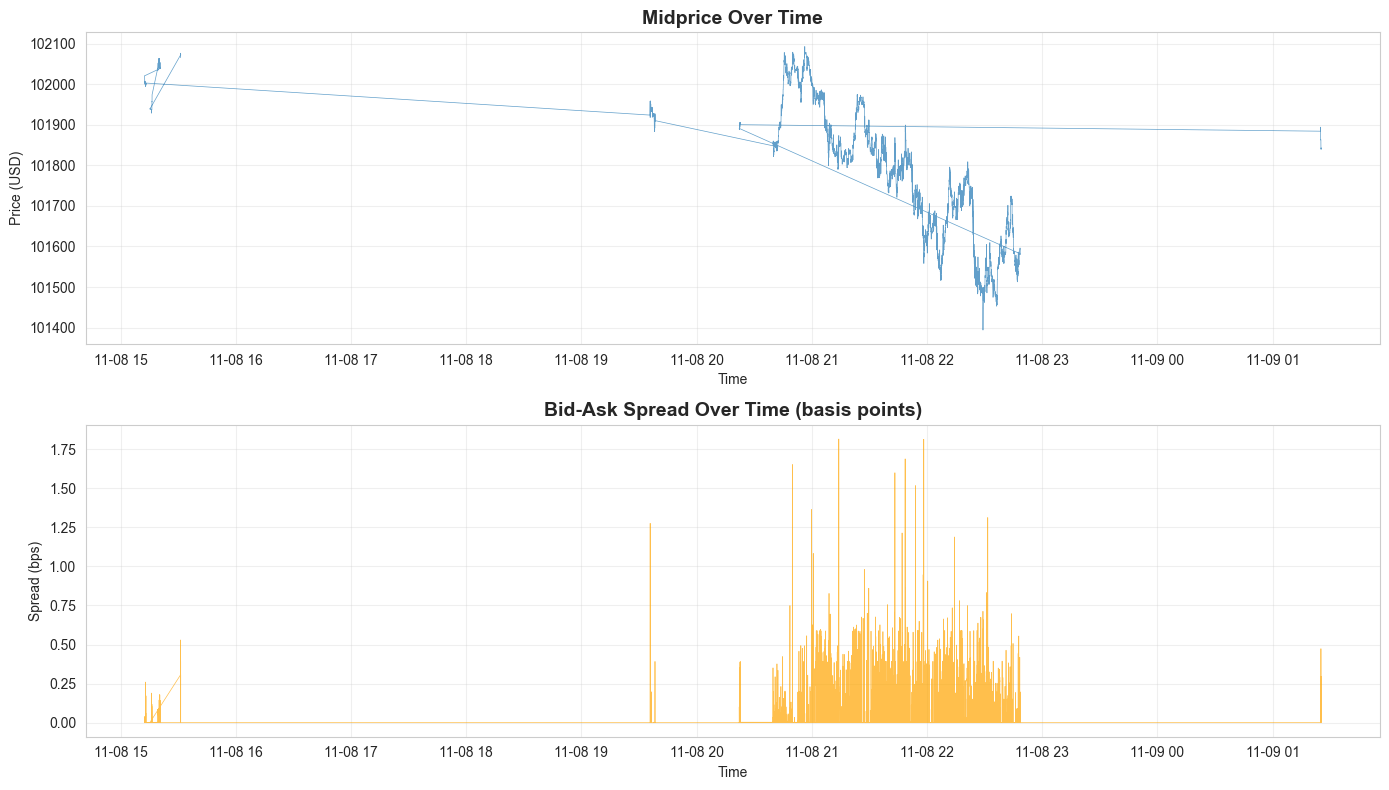

In [6]:
# Plot price over time
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Price
axes[0].plot(df['timestamp'], df['price'], linewidth=0.5, alpha=0.7)
axes[0].set_title('Midprice Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Price (USD)')
axes[0].grid(True, alpha=0.3)

# Spread
axes[1].plot(df['timestamp'], df['spread_bps'], linewidth=0.5, alpha=0.7, color='orange')
axes[1].set_title('Bid-Ask Spread Over Time (basis points)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Spread (bps)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

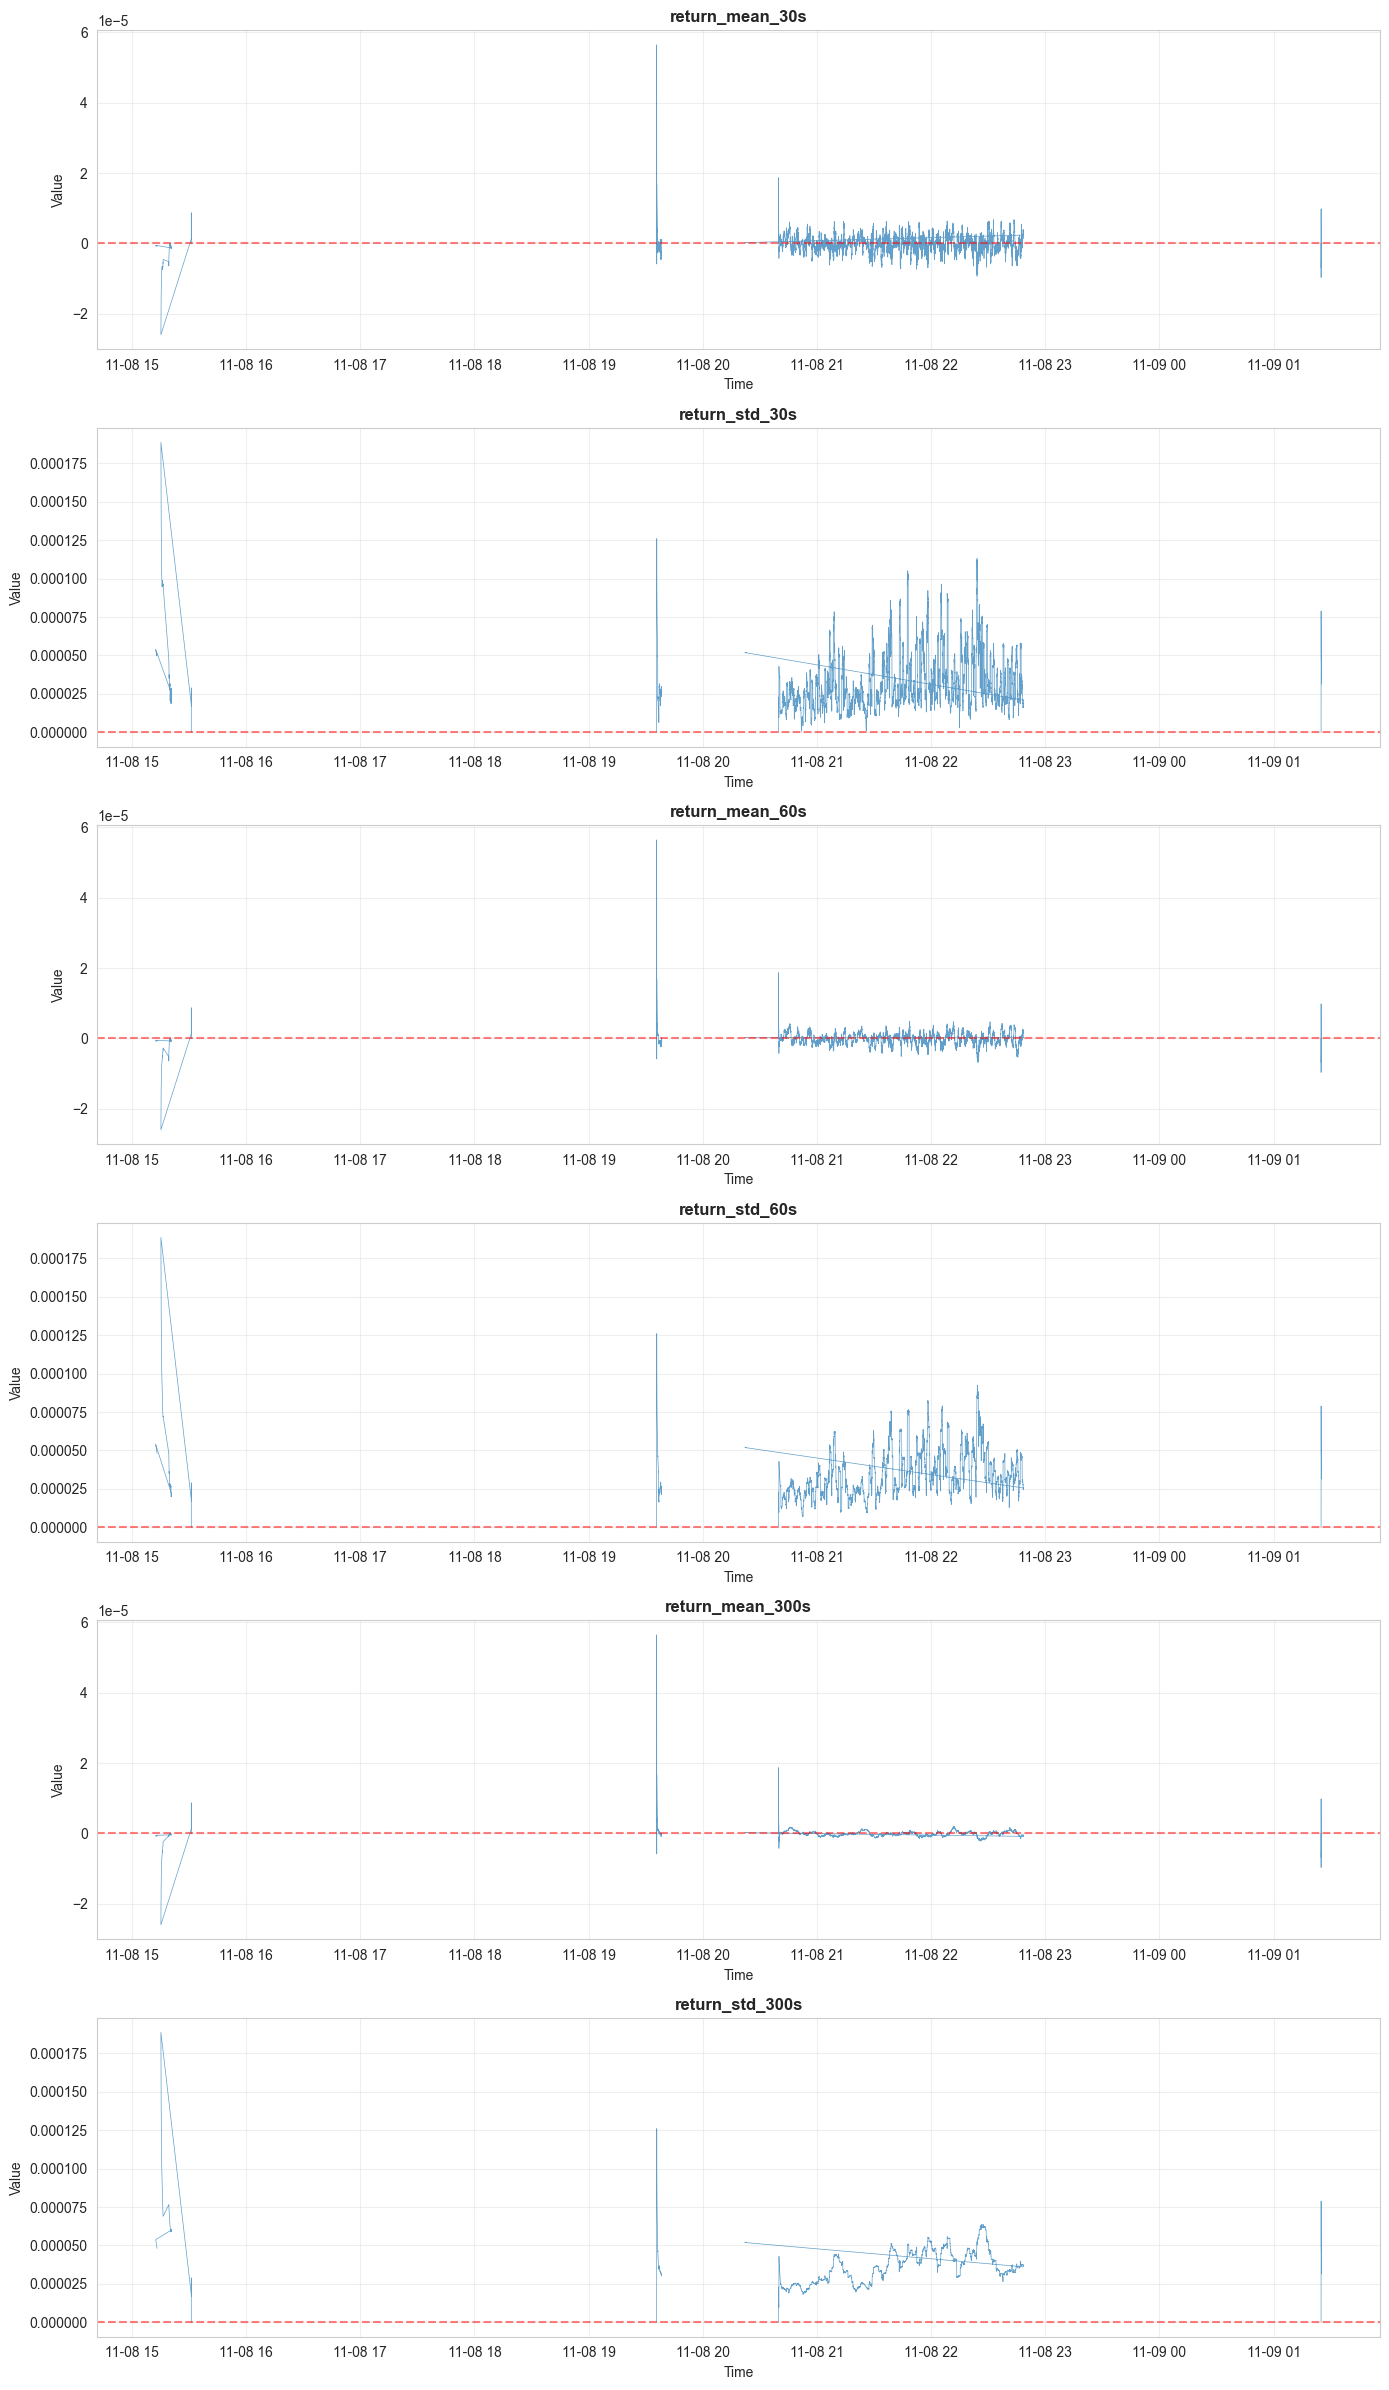

In [7]:
# Analyze returns
return_cols = [col for col in df.columns if 'return_mean' in col or 'return_std' in col]

fig, axes = plt.subplots(len(return_cols), 1, figsize=(14, 4 * len(return_cols)))

if len(return_cols) == 1:
    axes = [axes]

for i, col in enumerate(return_cols):
    axes[i].plot(df['timestamp'], df[col], linewidth=0.5, alpha=0.7)
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Value')
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(y=0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 3. Volatility Analysis & Threshold Selection

We need to compute **forward-looking volatility** to create our labels.

In [8]:
# Compute forward-looking volatility (our target)
# We'll use 60-second horizon as specified in the assignment

HORIZON_SECONDS = 60

# Sort by timestamp to ensure correct ordering
df = df.sort_values('timestamp').reset_index(drop=True)

# Calculate rolling forward volatility
# Using rolling window looking FORWARD (shift backwards)
df['price_pct_change'] = df['price'].pct_change()

# Estimate number of ticks in 60 seconds (will vary by market activity)
# Let's calculate average ticks per second
time_diff = (df['timestamp'].max() - df['timestamp'].min()).total_seconds()
ticks_per_second = len(df) / time_diff
window_size = int(ticks_per_second * HORIZON_SECONDS)

print(f"Average ticks per second: {ticks_per_second:.2f}")
print(f"Window size for {HORIZON_SECONDS}s: {window_size} ticks")

# Compute forward-looking volatility (shifted backwards)
df['future_volatility'] = df['price_pct_change'].shift(-window_size).rolling(window=window_size).std()

# Drop NaN values at the end
df_clean = df.dropna(subset=['future_volatility']).copy()

print(f"\nAfter computing future volatility: {len(df_clean)} valid rows")

Average ticks per second: 0.93
Window size for 60s: 55 ticks

After computing future volatility: 33925 valid rows


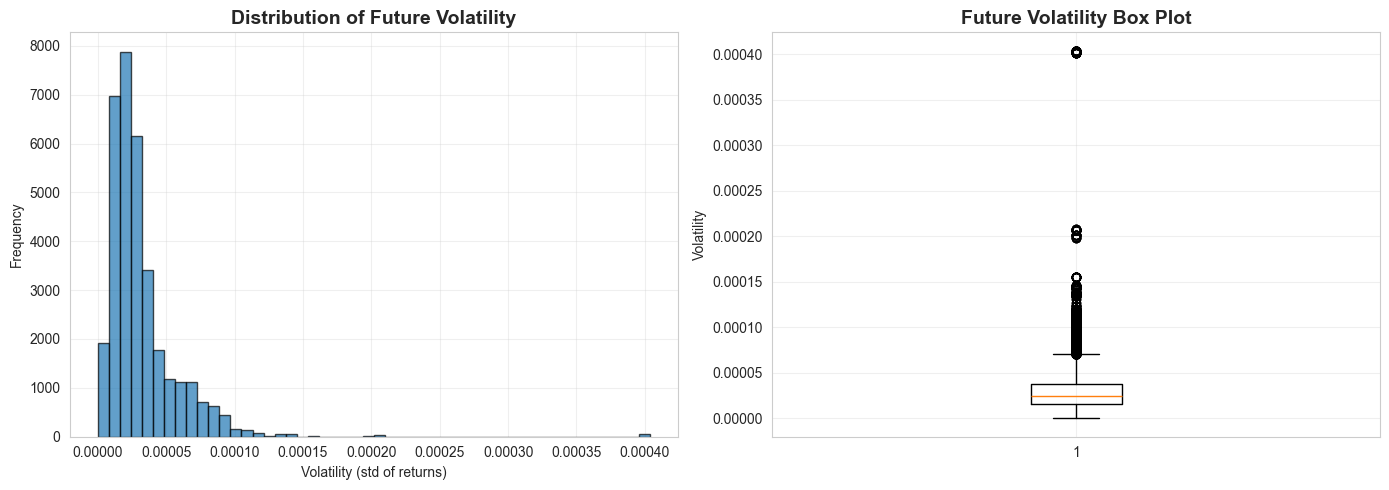

In [9]:
# Plot distribution of future volatility
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_clean['future_volatility'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Future Volatility', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Volatility (std of returns)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df_clean['future_volatility'], vert=True)
axes[1].set_title('Future Volatility Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Volatility')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Volatility Percentiles:
----------------------------------------
  50th percentile: 0.000024 (16963 spikes, 50.0%)
  75th percentile: 0.000038 (8482 spikes, 25.0%)
  80th percentile: 0.000044 (6786 spikes, 20.0%)
  85th percentile: 0.000053 (5090 spikes, 15.0%)
  90th percentile: 0.000066 (3393 spikes, 10.0%)
  95th percentile: 0.000081 (1697 spikes, 5.0%)
  99th percentile: 0.000112 (341 spikes, 1.0%)


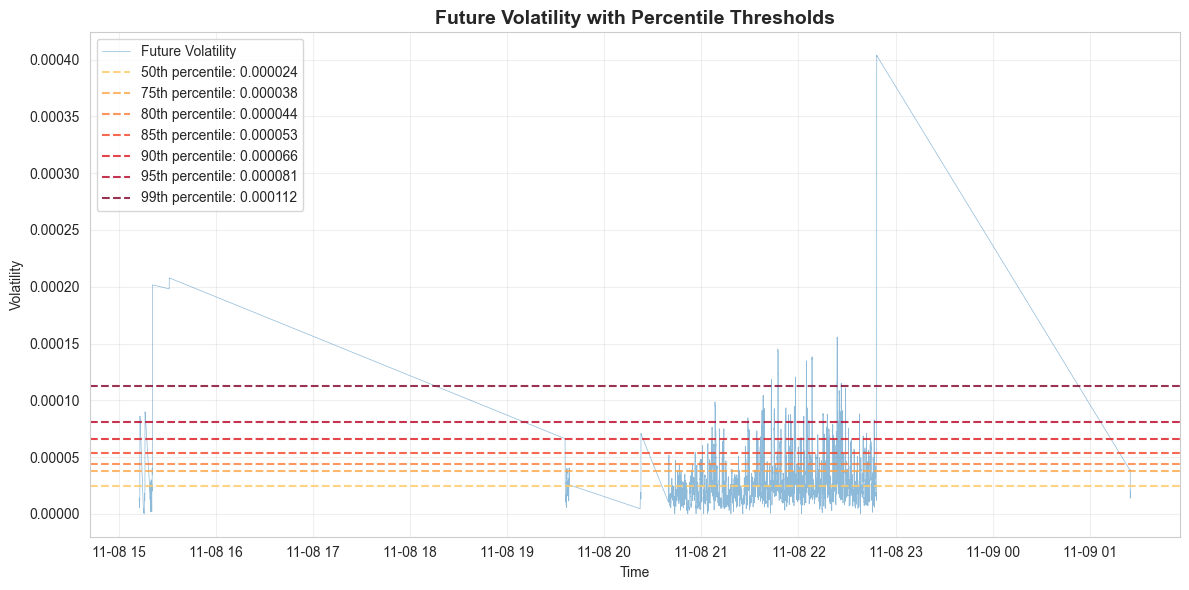

In [10]:
# Percentile analysis to choose threshold
percentiles = [50, 75, 80, 85, 90, 95, 99]
percentile_values = {}

print("Volatility Percentiles:")
print("-" * 40)
for p in percentiles:
    value = np.percentile(df_clean['future_volatility'], p)
    percentile_values[p] = value
    count = (df_clean['future_volatility'] >= value).sum()
    pct = (count / len(df_clean)) * 100
    print(f"  {p}th percentile: {value:.6f} ({count} spikes, {pct:.1f}%)")

# Visualize percentiles
plt.figure(figsize=(12, 6))
plt.plot(df_clean['timestamp'], df_clean['future_volatility'], 
         linewidth=0.5, alpha=0.5, label='Future Volatility')

colors = plt.cm.YlOrRd(np.linspace(0.3, 1, len(percentiles)))
for i, (p, value) in enumerate(percentile_values.items()):
    plt.axhline(y=value, color=colors[i], linestyle='--', 
                label=f'{p}th percentile: {value:.6f}', alpha=0.8)

plt.title('Future Volatility with Percentile Thresholds', fontsize=14, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Select Threshold & Create Labels

In [11]:
# Choose threshold - typically 90th or 95th percentile for rare events
# Adjust based on your data!
THRESHOLD_PERCENTILE = 90
THRESHOLD = np.percentile(df_clean['future_volatility'], THRESHOLD_PERCENTILE)

print(f"Selected Threshold: {THRESHOLD:.6f} ({THRESHOLD_PERCENTILE}th percentile)")

# Create binary labels
df_clean['label'] = (df_clean['future_volatility'] >= THRESHOLD).astype(int)

# Class distribution
label_counts = df_clean['label'].value_counts()
print(f"\nClass Distribution:")
print(f"  No Spike (0): {label_counts.get(0, 0)} ({label_counts.get(0, 0)/len(df_clean)*100:.1f}%)")
print(f"  Spike (1):    {label_counts.get(1, 0)} ({label_counts.get(1, 0)/len(df_clean)*100:.1f}%)")

Selected Threshold: 0.000066 (90th percentile)

Class Distribution:
  No Spike (0): 30532 (90.0%)
  Spike (1):    3393 (10.0%)


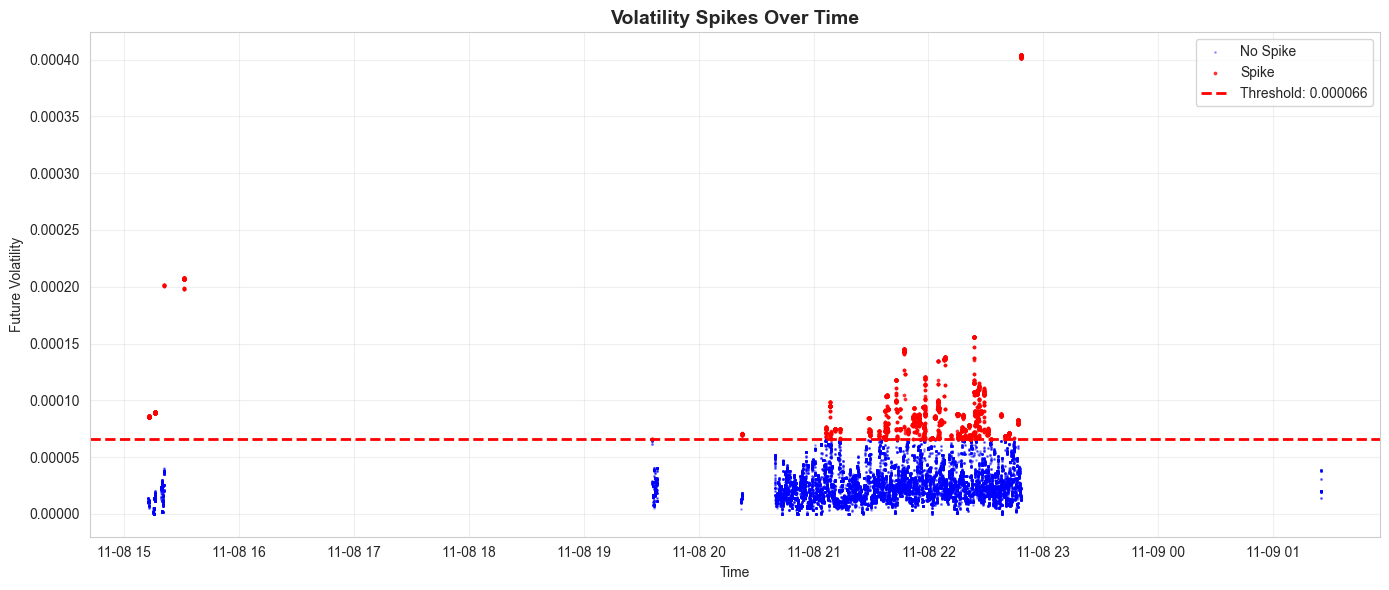

In [12]:
# Visualize labeled data
fig, ax = plt.subplots(figsize=(14, 6))

# Plot all points
no_spike = df_clean[df_clean['label'] == 0]
spike = df_clean[df_clean['label'] == 1]

ax.scatter(no_spike['timestamp'], no_spike['future_volatility'], 
           s=1, alpha=0.3, label='No Spike', color='blue')
ax.scatter(spike['timestamp'], spike['future_volatility'], 
           s=3, alpha=0.7, label='Spike', color='red')

ax.axhline(y=THRESHOLD, color='red', linestyle='--', 
           label=f'Threshold: {THRESHOLD:.6f}', linewidth=2)

ax.set_title('Volatility Spikes Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Time')
ax.set_ylabel('Future Volatility')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Feature Correlation Analysis

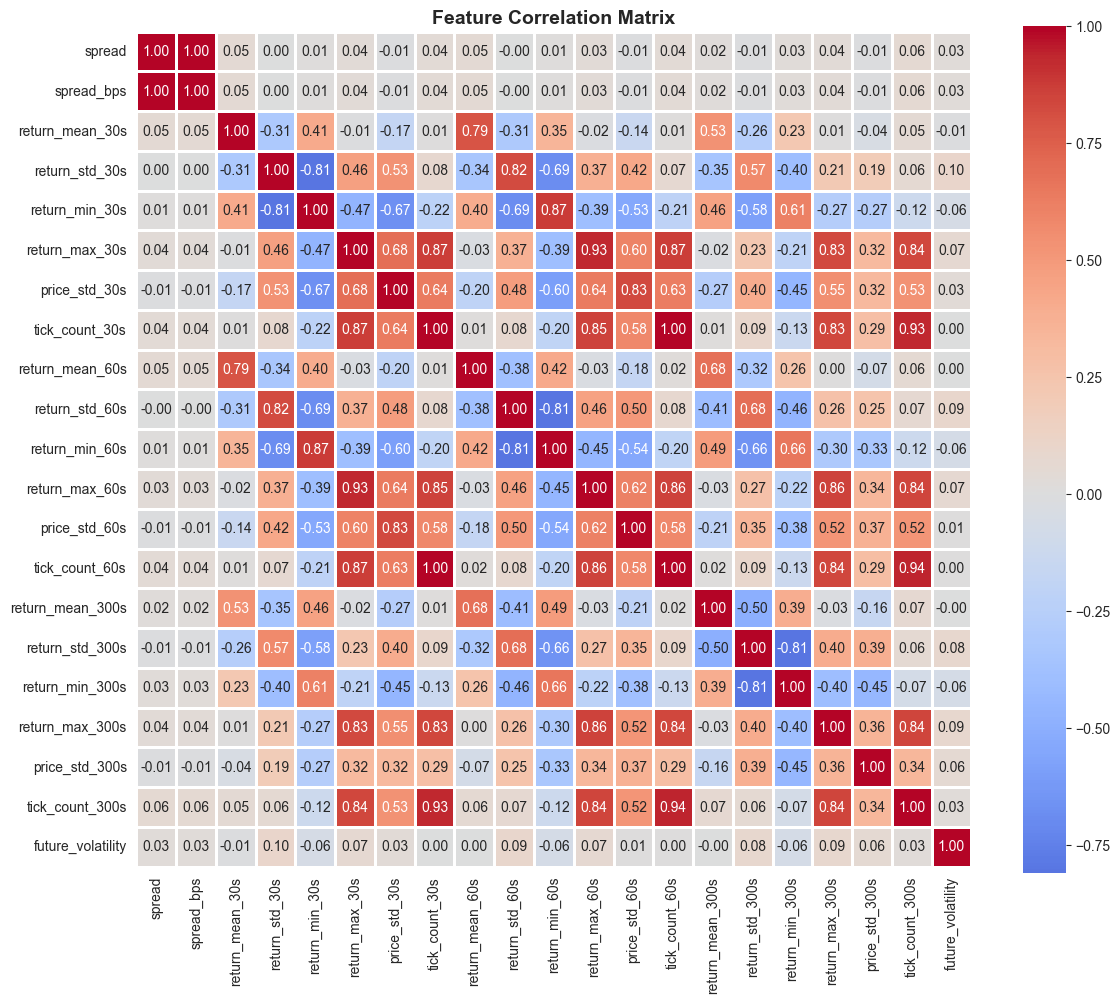

In [13]:
# Select numeric features for correlation
feature_cols = [col for col in df_clean.columns if 
                any(x in col for x in ['return', 'spread', 'tick_count', 'price_std'])]
feature_cols.append('future_volatility')

# Correlation matrix
corr_matrix = df_clean[feature_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Save Labeled Dataset

In [ ]:
#create volatility spikes
df_clean['label'] = (df_clean['future_volatility'] >= THRESHOLD).astype(int)
df_clean['volatility_spike'] = df_clean['label'].astype(int)

# Rename columns to match train.py expectations (for compatibility)
# This creates aliases so both naming conventions work
column_mapping = {
    'return_mean_60s': 'price_return_1min',      # 1-minute return
    'return_mean_300s': 'price_return_5min',     # 5-minute return
    'return_std_300s': 'price_volatility_5min',  # 5-minute volatility
    'spread': 'bid_ask_spread',                  # bid-ask spread
    # 'spread_bps' already matches 'bid_ask_spread_bps' expected name
    # 'volume_24h_pct_change' not available - will be skipped in training
}

# Create new columns with expected names (keep original columns too)
for old_name, new_name in column_mapping.items():
    if old_name in df_clean.columns:
        df_clean[new_name] = df_clean[old_name]

# Also ensure spread_bps has the expected alias
if 'spread_bps' in df_clean.columns and 'bid_ask_spread_bps' not in df_clean.columns:
    df_clean['bid_ask_spread_bps'] = df_clean['spread_bps']

# Save with labels and future volatility
output_path = '../data/processed/features_labeled.parquet'
df_clean.to_parquet(output_path, index=False)
print(f"✓ Saved labeled dataset to {output_path}")
print(f"  Shape: {df_clean.shape}")
print(f"  ✓ Added feature aliases for train.py compatibility")

✓ Saved labeled dataset to ../data/processed/features_labeled.parquet
  Shape: (33925, 32)


## Summary

**Key Findings:**
- Dataset size: [fill in]
- Time range: [fill in]
- Selected threshold (τ): [fill in]
- Spike rate: [fill in]%
- Most correlated features with future volatility: [fill in]

**Next Steps:**
1. Document these findings in `docs/feature_spec.md`
2. Generate Evidently report
3. Move to Milestone 3: Model training